# Lab 6
Noah Kim Section AC

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle as pkl
plt.rcParams["figure.figsize"] = (10,6)

In [30]:
#Generating the random data in a poisson distribution and the Poisson PMF
poisson_dist = stats.poisson.rvs(100,size=100000)

#Creating my PMF to fit my data
x= np.arange(poisson_dist.min(),poisson_dist.max())
pmf = stats.poisson.pmf(x,100)*100000


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

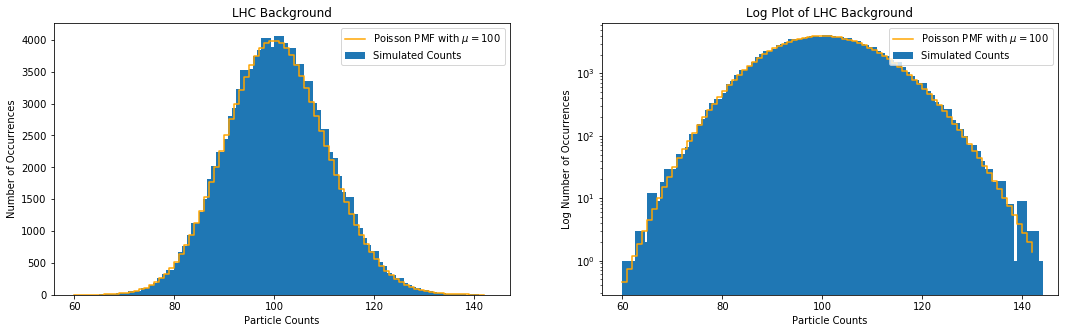

In [35]:
fig,ax = plt.subplots(1,2,figsize=(18,5))

ax[0].hist(poisson_dist,bins=100,width=2,label = "Simulated Counts")
ax[0].set_title('LHC Background')
ax[0].set_xlabel('Particle Counts')
ax[0].set_ylabel('Number of Occurrences')
ax[0].step(x,pmf,color='orange',label=r'Poisson PMF with $\mu=100$',where='post')
ax[0].legend()

ax[1].hist(poisson_dist,bins=100,width=2,label = "Simulated Counts")
ax[1].set_title('Log Plot of LHC Background')
ax[1].set_xlabel('Particle Counts')
ax[1].set_ylabel('Log Number of Occurrences')
ax[1].step(x,pmf,color='orange',label=r'Poisson PMF with $\mu=100$',where='post')
ax[1].set_yscale('log')
ax[1].legend();

In [36]:
prob = 1 - stats.norm.cdf(5)
thresh = stats.poisson.ppf(1-prob,100)
print(thresh)

154.0
